DSA LAB: Namibia Map w/ village

Create new environment when using conda

In [ ]:
%conda create -n geo_env
%conda activate geo_env
%conda config --env --add channels conda-forge
%conda config --env --set channel_priority strict

Installing Packages

In [ ]:
%conda install python=3 geopandas

In [ ]:
%conda install python=3 fiona

In [ ]:
%conda install python=3 shapely

In [ ]:
%conda install python=3 pyproj

In [ ]:
%conda install python=3 packaging

In [ ]:
%conda install python=3 matplotlib

Now for the code

            City  Country   Latitude  Longitude                    geometry
0        Gobabis  Namibia -22.399795  18.967887  POINT (18.96789 -22.39979)
1   Grootfontein  Namibia -19.571834  18.104352  POINT (18.10435 -19.57183)
2    Henties Bay  Namibia -22.096164  14.282861  POINT (14.28286 -22.09616)
3  Katima Mulilo  Namibia -17.505980  24.278197  POINT (24.27820 -17.50598)
4   Keetmanshoop  Namibia -26.563415  18.133792  POINT (18.13379 -26.56342)
Namibia


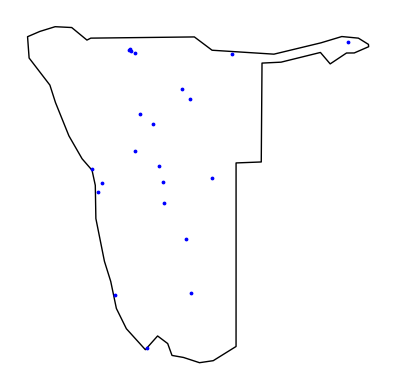

In [1]:
from unittest.mock import CallableMixin
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

cities = pd.read_csv('cities.csv', skipinitialspace = True)
#print(cities.head())

citiesgdf = geopandas.GeoDataFrame(
    cities, geometry=geopandas.points_from_xy(cities.Longitude, cities.Latitude))

print(citiesgdf.head())

citiesgdf=citiesgdf.set_crs('Namibia') #syncs map to world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.name=='Namibia'].plot(color='white', edgecolor='black', legend=True)
ax.set_axis_off()



citiesgdf.plot(ax=ax, c='blue', markersize=3)

#plt.show()
print(citiesgdf.crs)
citiesgdf.explore(
     column="City", # make choropleth based on "BoroName" column
     tooltip="City", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     #cmap="Set1", # use "Set1" matplotlib colormap

     #style_kwds=dict(color="black") # use black outline
     marker_kwds=dict(radius=2.5, fill=True)
    )
